In [1]:
# !pip install scikit-fuzzy

19.81894150417827


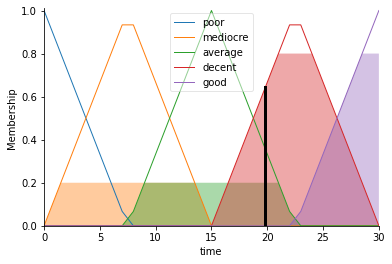

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
dust = ctrl.Antecedent(np.arange(0, 11, 1), 'dust')
cloth = ctrl.Antecedent(np.arange(0, 11, 1), 'cloth')
time = ctrl.Consequent(np.arange(0, 31, 1), 'time')
dust.automf(3)
cloth.automf(3)
time.automf(5)
# dust.view()
# cloth.view()
# time.view()
rule1 = ctrl.Rule(dust['poor'] and cloth['poor'], time['poor'])
rule2 = ctrl.Rule(dust['poor'] and cloth['average'], time['mediocre'])
rule3 = ctrl.Rule(dust['poor'] and cloth['good'], time['decent'])
rule4 = ctrl.Rule(cloth['average'] and cloth['poor'], time['mediocre'])
rule5 = ctrl.Rule(cloth['average'] and dust['average'], time['average'])
rule6 = ctrl.Rule(cloth['average'] and dust['good'], time['decent'])
rule7 = ctrl.Rule(cloth['good'] and dust['poor'], time['mediocre'])
rule8 = ctrl.Rule(cloth['good'] and dust['average'], time['decent'])
rule9 = ctrl.Rule(cloth['good'] and dust['good'], time['good'])
# for r in (rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9):
#   r.view()
timing = ctrl.ControlSystemSimulation(ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]))
timing.input['dust']=9
timing.input['cloth']=9
timing.compute()
print(timing.output['time'])
time.view(sim=timing)